In [ ]:
import numpy as np, random
def set_seed(seed):
  np.random.seed(seed)
  random.seed(seed)
set_seed(810109203)


#loading data from dataset

In [ ]:
import pandas as pd
df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")

#filling N/As in rows pace and dribbling

In [ ]:
average_of_pace = df['pace'].mean()
df['pace'].fillna(average_of_pace, inplace=True)

average_of_dribbling = df['dribbling'].mean()
df['dribbling'].fillna(average_of_dribbling, inplace=True)

#age column box plot

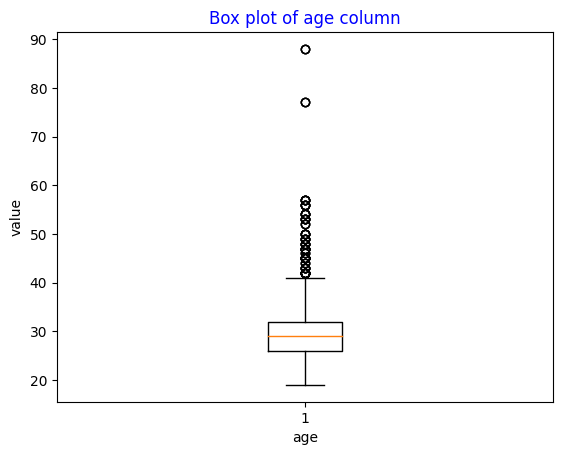

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'].dropna())

plt.title("Box plot of age column", color='b')
plt.xlabel('age')
plt.ylabel('value')

plt.show()

In [ ]:
age_column = df['age'].dropna()
summary_stats = age_column.describe()

minimum = summary_stats['min']
Q1 = summary_stats['25%']
Q2 = summary_stats['50%']
Q3 = summary_stats['75%']
maximum = summary_stats['max']

print('min = ', minimum)
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('max = ', maximum)

min =  19.0
Q1 =  26.0
Q2 =  29.0
Q3 =  32.0
max =  88.0


#sampling weight RV

In [ ]:
import math
random_sample = age_column.sample(n=1000, random_state=set_seed(810109203), replace=False)

sam_mean = random_sample.mean()
sam_var = random_sample.var()
sam_sd = math.sqrt(sam_var)

print('mean = ', sam_mean)
print('variance = ', sam_var)
print('standard deviation = ', sam_sd)

mean =  29.093
variance =  28.072423423423423
standard deviation =  5.298341572928591


#making a normal sample by mean and std_deviation of the lprevious part

In [ ]:
normal_sample = np.random.normal(sam_mean, sam_sd, size=1000)

#comparing random_sample with normal using Q-Q plot

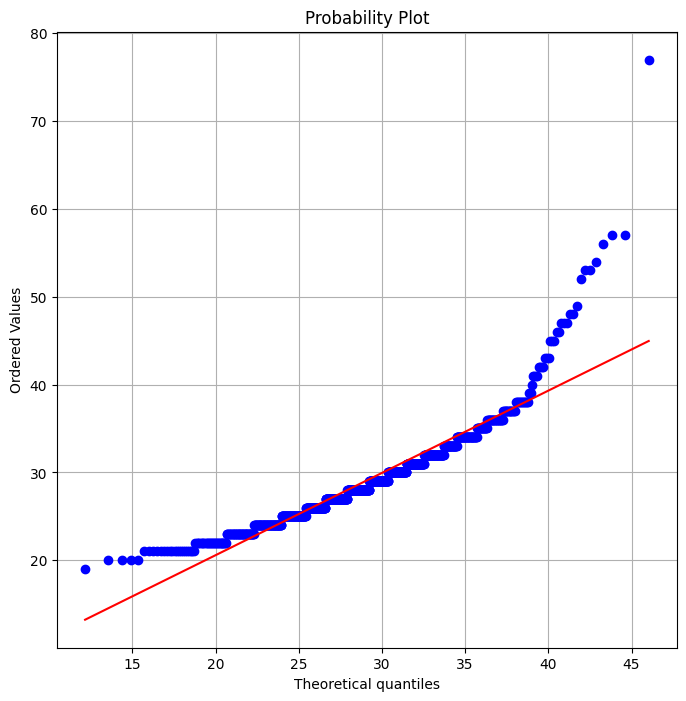

In [ ]:
from scipy.stats import norm, probplot

plt.figure(figsize=(8, 8))
probplot(random_sample, dist=norm, sparams=(sam_mean, sam_sd), plot=plt)
plt.grid(True)
plt.show()

#comparing normal_sample with normal using Q-Q plot

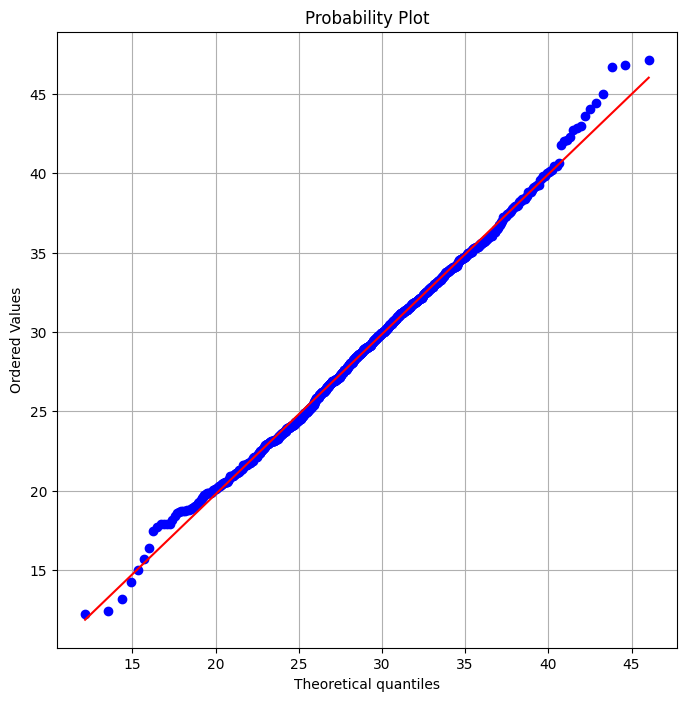

In [ ]:
plt.figure(figsize=(8, 8))
probplot(normal_sample, dist=norm, sparams=(sam_mean, sam_sd), plot=plt)
plt.grid(True)
plt.show()

#Shapiro_Wilk Test

In [ ]:
import scipy.stats as stats
statistic, p_value = stats.shapiro(random_sample)

print(p_value)

1.890387099856564e-27


*  n = 100 -> p_value = 0.0021156591828912497
*  n = 500 -> p_value = 5.437602950374154e-13
*  n = 1000 -> p_value = 3.901453452291644e-19

#part 4

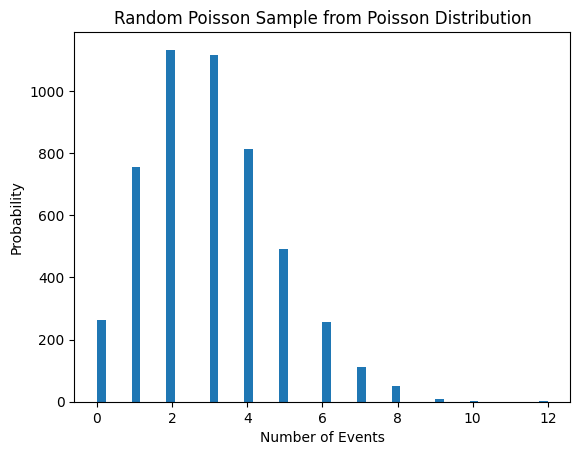

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

set_seed(810109203)
parameter = 3
sample_size = 5000

poi_sample = np.random.poisson(parameter, sample_size)
plt.hist(poi_sample, bins='auto')

# Add labels and legend
plt.title('Random Poisson Sample from Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')

plt.show()

#comparing using Q-Q plot n = 5

p_value =  0.04354258254170418


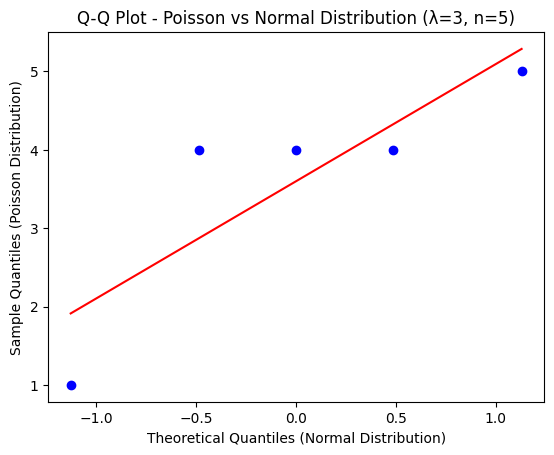

In [ ]:
from scipy import stats
import scipy.stats as stats
poi_sample_5 = np.random.poisson(parameter, 5)
statistic, p_value = stats.shapiro(poi_sample_5)
print("p_value = ", p_value)
stats.probplot(poi_sample_5, dist="norm", plot=plt)

plt.title(f'Q-Q Plot - Poisson vs Normal Distribution (λ={parameter}, n={5})')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Poisson Distribution)')
plt.show()

#comparing using Q-Q plot n = 50

p_value =  0.010807190090417862


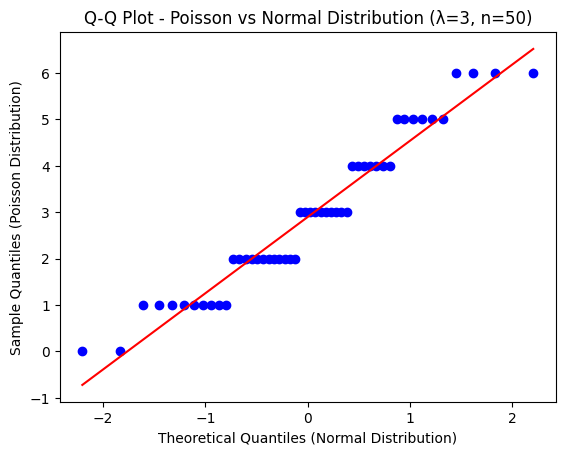

In [ ]:
poi_sample_50 = np.random.poisson(parameter, 50)
statistic, p_value = stats.shapiro(poi_sample_50)
print("p_value = ", p_value)

stats.probplot(poi_sample_50, dist="norm", plot=plt)

plt.title(f'Q-Q Plot - Poisson vs Normal Distribution (λ={parameter}, n={50})')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Poisson Distribution)')
plt.show()

#comparing using Q-Q plot n = 5000

p_value =  2.937716012033383e-38


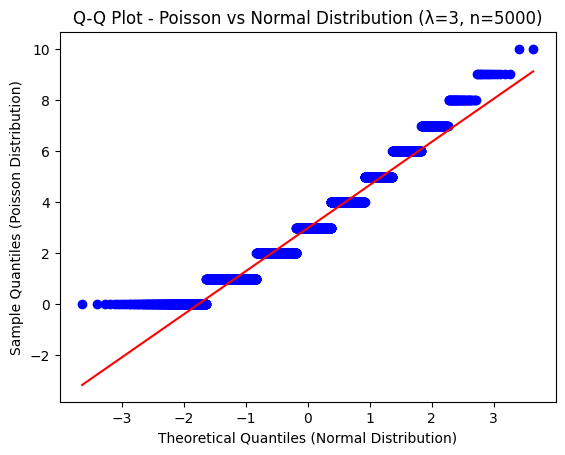

In [ ]:
poi_sample_5000 = np.random.poisson(parameter, 5000)
statistic, p_value = stats.shapiro(poi_sample_5000)
print("p_value = ", p_value)
stats.probplot(poi_sample_5000, dist="norm", plot=plt)

plt.title(f'Q-Q Plot - Poisson vs Normal Distribution (λ={parameter}, n={5000})')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Poisson Distribution)')
plt.show()